# Task No 3 - Exploratory Data Analysis (Beginner level)

In this task, I am going to perform EDA on SuperStore data.

**Author:** Shahzad Abbas

## Importing Important Modules

In [7]:
import json
import pandas as pd
import folium as fm
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (12, 6)

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading Data

In [10]:
path = r"D:\CHAND's DATA\Study data\Additional Work\Data Science\Spark Foundation Internship\Task 3\SampleSuperstore.csv"
df = pd.read_csv(path)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [11]:
df.shape

(9994, 13)

## Univariate Analysis 

In [12]:
def per_on_bar(plot,feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

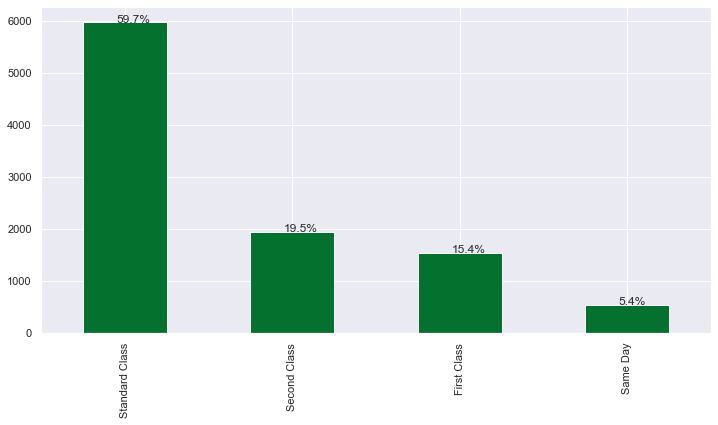

In [13]:
sns.set(palette="BuGn_r")
ax = df["Ship Mode"].value_counts().plot(kind="bar")
per_on_bar(ax, df["Ship Mode"])

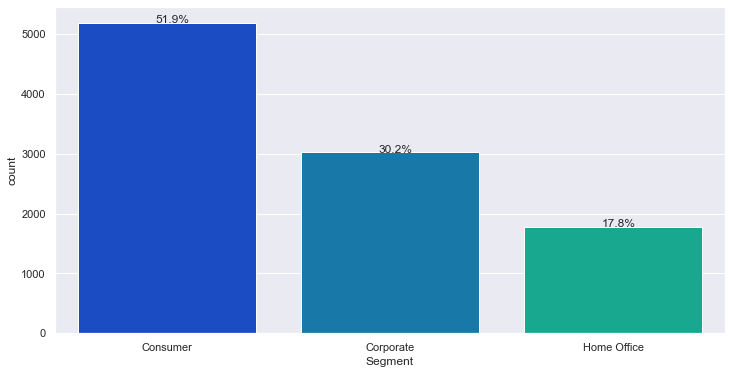

In [14]:
ax = sns.countplot(df["Segment"], palette="winter")
per_on_bar(ax, df["Segment"])

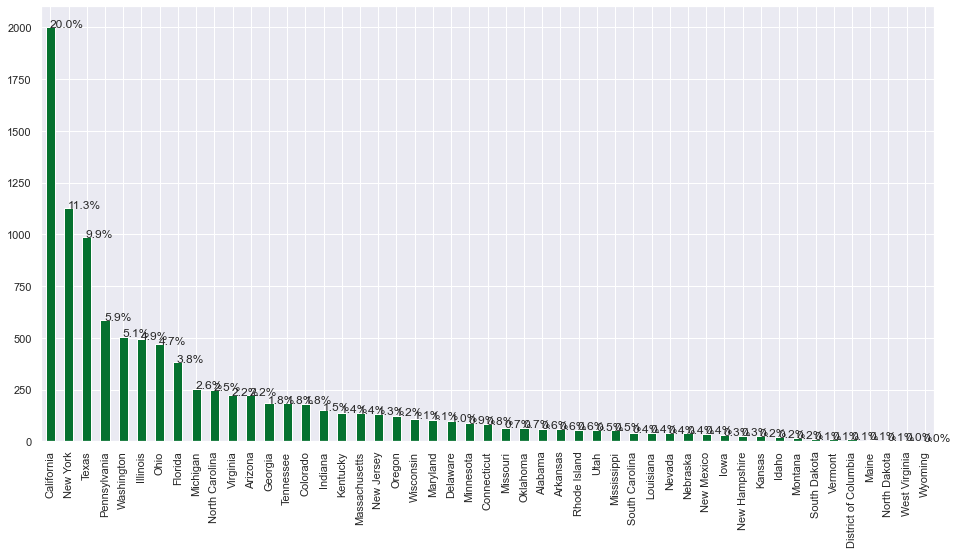

In [15]:
plt.figure(figsize=(16,8))
ax = df.State.value_counts().plot(kind="bar")
per_on_bar(ax, df["State"])

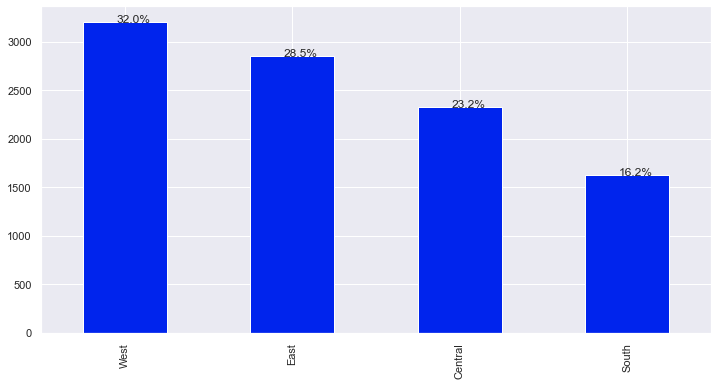

In [16]:
sns.set(palette="winter")
ax = df["Region"].value_counts().plot(kind="bar")
per_on_bar(ax, df["Region"])

In [38]:
px.pie(values=df.Category.value_counts(), names=df.Category.unique())

In [40]:
px.pie(values=df["Sub-Category"].value_counts(), names=df["Sub-Category"].unique())

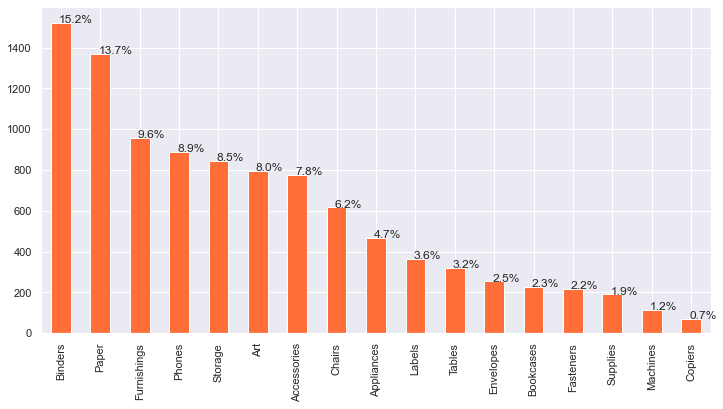

In [18]:
sns.set(palette='rainbow_r')
ax = df["Sub-Category"].value_counts().plot(kind="bar")
per_on_bar(ax, df["Sub-Category"])

## Bivariate Analysis

In [19]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [20]:
## Function to plot stacked bar chart
def stacked_plot(x, y):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,y,margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,y,normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.show()

Segment         Consumer  Corporate  Home Office   All
Ship Mode                                             
First Class          769        485          284  1538
Same Day             317        114          112   543
Second Class        1020        609          316  1945
Standard Class      3085       1812         1071  5968
All                 5191       3020         1783  9994
------------------------------------------------------------------------------------------------------------------------


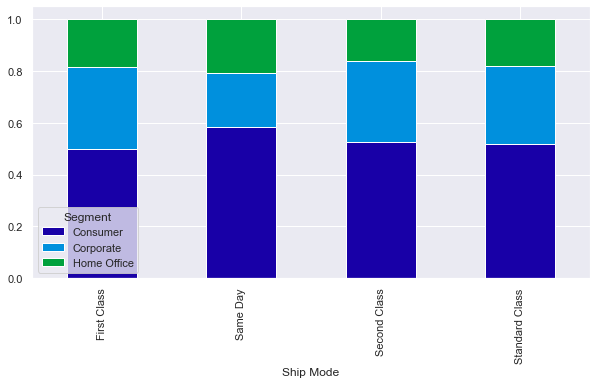

In [21]:
stacked_plot(df["Ship Mode"], df.Segment)

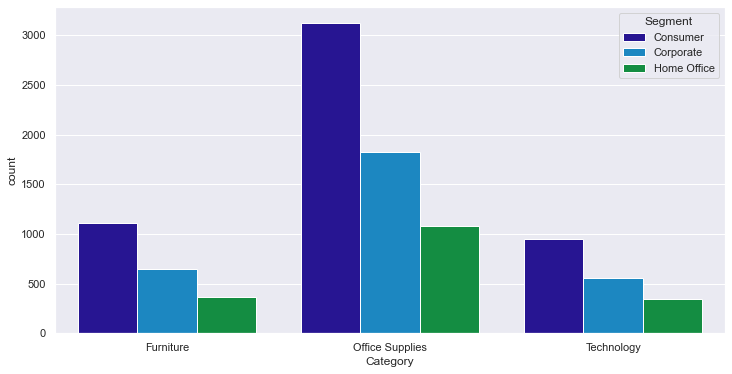

In [43]:
sns.countplot(df.Category, hue=df.Segment)
plt.show()

In [22]:
df.pivot_table(values="Profit", index="Segment", columns="Discount")

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,64.161707,93.630090,15.744638,22.426571,-48.018291,-102.708631,-93.462041,-216.651900,-253.572181,-38.639822,-106.962433,-115.213404
Corporate,71.584290,99.802956,49.282143,23.157672,-46.241380,-82.702010,-132.003562,-280.968633,-388.164788,-40.623326,-68.023771,-96.815833
Home Office,66.961384,97.234865,30.271889,34.734830,-37.189678,-57.226350,-119.900858,-175.146900,-377.121333,-60.039948,-115.479956,-62.509202


<AxesSubplot:ylabel='Frequency'>

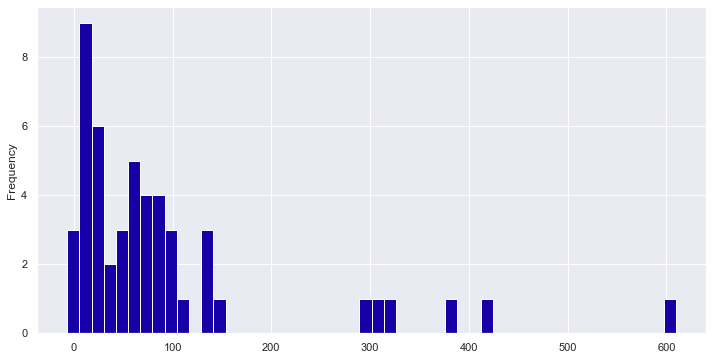

In [23]:
df1 = df.loc[(df.Segment=="Consumer") & (df.Discount==0.1)]
df1.Profit.plot.hist(bins=50)

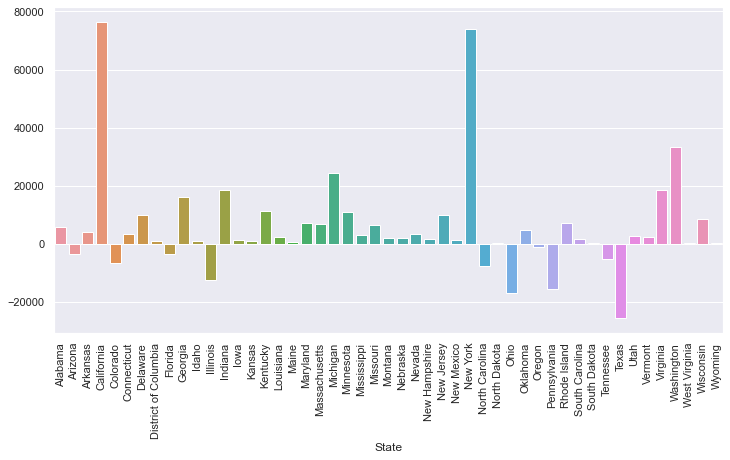

In [31]:
temp = df.groupby("State")["Profit"].sum()
plt.xticks(rotation=90)
sns.barplot(x=temp.index, y=temp.values)
plt.show()

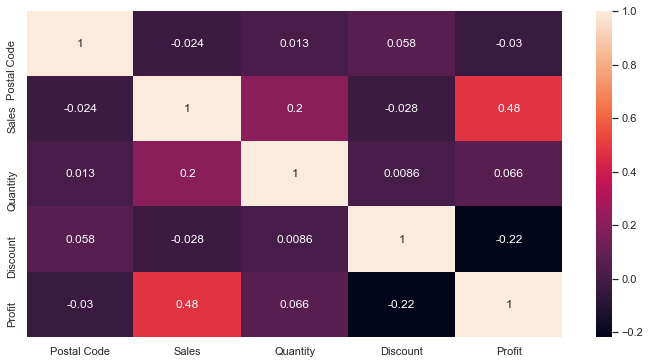

In [50]:
sns.heatmap(df.corr(), annot=True)
plt.show()

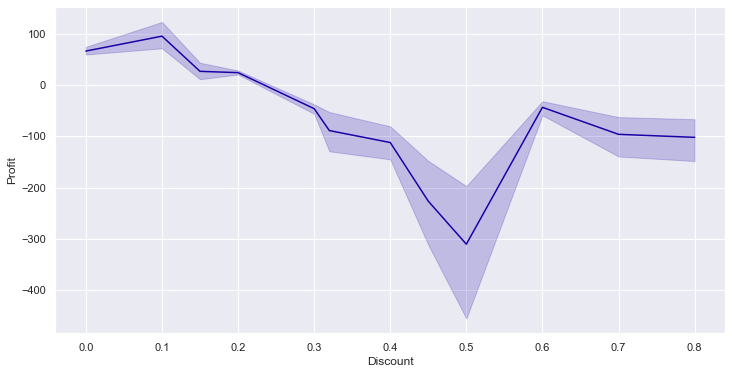

In [47]:
sns.lineplot(y=df.Profit, x=df.Discount)
plt.show()